###### <img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\miniconda3\envs\data\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

It is clear that there are 5 columns which contain only null values. Also, certain columns have less than 400 non-null values. We'll remove them from our dataframe.

#### Removing Insignificant Columns

In [4]:
data = data.dropna(axis =1, thresh = 400) #keep columns which has at least 400 non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 41 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

#### Null Values in Each Column

In [5]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough                                0
X Coordinate (St

#### Top 10 Complaint Types and Their Count

In [6]:
a = pd.DataFrame(data.groupby('Complaint Type')['Unique Key'].count())
a.columns = ['Count']
a.sort_values('Count', ascending = False)[:10]

,Count
Complaint Type,
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879


In [7]:
a.values[:2]

array([[    8],
       [10541]], dtype=int64)

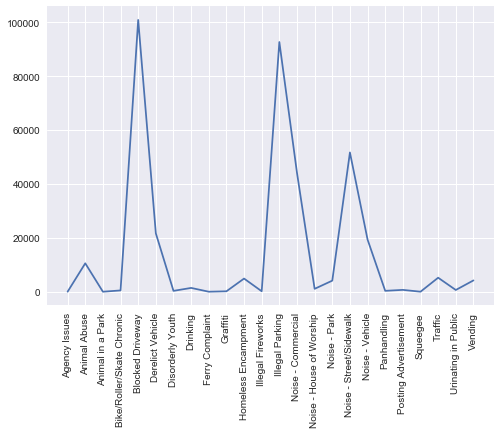

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()
ax.plot(a.index, a.values)
plt.xticks(rotation = 'vertical');


##### Bar Chart : Complaint Tpye vs Count

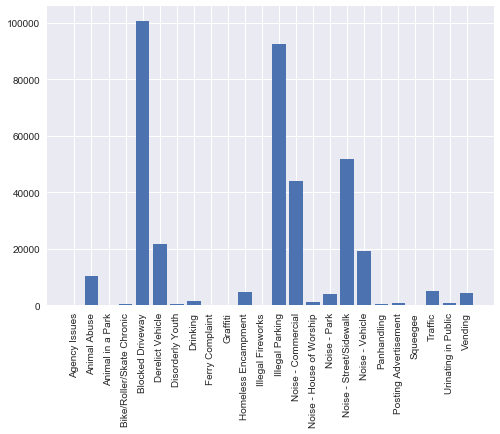

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()
ax.bar(a.index,a['Count']) #a.values didn't work. Hence a['Count']
plt.xticks(rotation = 'vertical');

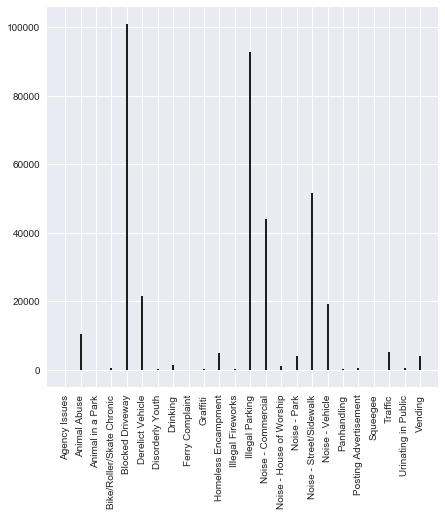

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.vlines(a.index, 0, a['Count'])
plt.xticks(rotation = 'vertical');

#### Datewise Call Counting

First data in `Created Date` needs to be worked with. Its dtype is `object` which needs to be changed into proper datetime dtype.

In [11]:
dt = pd.to_datetime(data['Created Date'], errors = 'coerce') 
#errors = 'coerce' is important here. Otherwise error will be raised. 

In [12]:
data['Create Date'] = dt #add new column to original data with formatted datetime data.

In [13]:
data['Create Date'][:3] #sample check

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
Name: Create Date, dtype: datetime64[ns]

In [14]:
data['Create Date'] = pd.DatetimeIndex(data['Create Date']).normalize()  

#converting into date. Removes HH:MM:SS part.  

In [15]:
by_date = pd.DataFrame(data.groupby('Create Date')['Unique Key'].count())

##### Days of Least Calls Received


In [16]:
by_date.sort_values('Unique Key')[:10]

,Unique Key
Create Date,
2015-01-27,380
2015-01-14,496
2015-01-15,563
2015-01-26,579
2015-02-16,592
2015-01-17,600
2015-01-07,604
2015-01-19,605
2015-02-18,608


##### Days of Most Calls Received

In [17]:
by_date.sort_values('Unique Key', ascending = False)[:10]

,Unique Key
Create Date,
2015-05-10,1540
2015-05-30,1534
2015-06-07,1494
2015-09-19,1492
2015-08-29,1484
2015-09-26,1475
2015-07-25,1436
2015-09-27,1435
2015-08-22,1428


##### Visualization

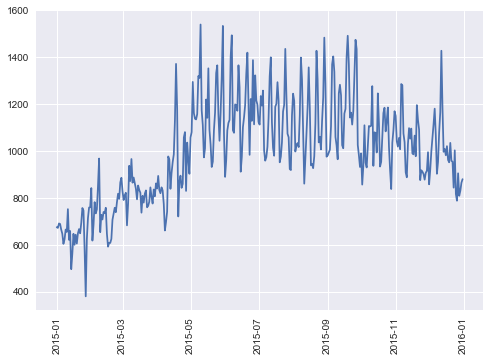

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()
ax.plot(by_date.index, by_date['Unique Key'])
plt.xticks(rotation = 'vertical');

In [20]:
data[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Create Date
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2015-12-31
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31


##### Day-to-Day Analysis for Each Complaint Type

In [21]:
dt_comtype = pd.DataFrame(data.groupby(['Create Date','Complaint Type'])['Unique Key'].count())
#it doesn't show those complaint types for which count is zero.

In [22]:
#filling the null values with zero so that compalint with zero values on any given day is visible.
df1 = dt_comtype.unstack().fillna(0).stack()
df1[:2]

Unique Key
Create Date Complaint Type            
2015-01-01  Agency Issues          0.0
            Animal Abuse          17.0

In [23]:
df1.unstack()[:2] #another view

Unique Key                                \
Complaint Type Agency Issues Animal Abuse Animal in a Park   
Create Date                                                  
2015-01-01               0.0         17.0              0.0   
2015-01-02               0.0         32.0              0.0   

                                                                            \
Complaint Type Bike/Roller/Skate Chronic Blocked Driveway Derelict Vehicle   
Create Date                                                                  
2015-01-01                           0.0            288.0             18.0   
2015-01-02                           1.0            223.0             53.0   

                                                                    ...    \
Complaint Type Disorderly Youth Drinking Ferry Complaint Graffiti   ...     
Create Date                                                         ...     
2015-01-01                  1.0      5.0             0.0      0.0   ...     
2015-01-02                  1.0      2.0             0.0      1.0   ...     

                                                                              \
Complaint Type Noise - House of Worship Noise - Park Noise - Street/Sidewalk   
Create Date                                                                    
2015-01-01                          2.0          1.0                    40.0   
2015-01-02                          1.0          3.0                    39.0   

                                                                           \
Complaint Type Noise - Vehicle Panhandling Posting Advertisement Squeegee   
Create Date                                                                 
2015-01-01                15.0         0.0                   0.0      0.0   
2015-01-02                21.0         0.0                   0.0      0.0   

                                                    
Complaint Type Traffic Urinating in Public Vending  
Create Date                                         
2015-01-01         2.0                 1.0     5.0  
2015-01-02         3.0                 1.0     8.0  

[2 rows x 24 columns]

In [24]:
#datewise data for a given complaint type
df2 = df1.unstack()['Unique Key']
df2['Animal Abuse'][:3]

Create Date
2015-01-01    17.0
2015-01-02    32.0
2015-01-03    26.0
Name: Animal Abuse, dtype: float64

In [25]:
df2.index[:2]

DatetimeIndex(['2015-01-01', '2015-01-02'], dtype='datetime64[ns]', name='Create Date', freq=None)

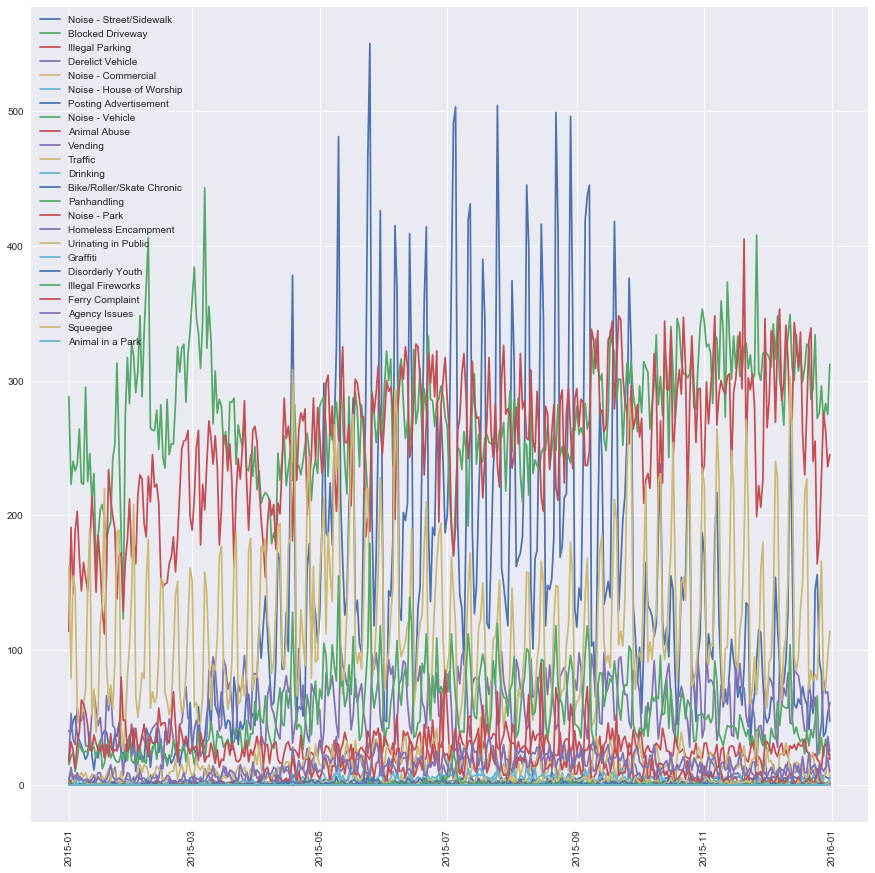

In [26]:
#ugly visualization

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure(figsize = (15,15))
ax = plt.axes()
for j in data['Complaint Type'].unique():
    ax.plot(df2.index, df2[j], label = j)
plt.legend(loc='best')
plt.xticks(rotation = 'vertical');


In [27]:
df2[:4]

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Create Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,17.0,0.0,0.0,288.0,18.0,1.0,5.0,0.0,0.0,...,2.0,1.0,40.0,15.0,0.0,0.0,0.0,2.0,1.0,5.0
2015-01-02,0.0,32.0,0.0,1.0,223.0,53.0,1.0,2.0,0.0,1.0,...,1.0,3.0,39.0,21.0,0.0,0.0,0.0,3.0,1.0,8.0
2015-01-03,0.0,26.0,0.0,1.0,240.0,34.0,0.0,2.0,0.0,1.0,...,1.0,0.0,47.0,24.0,0.0,0.0,0.0,8.0,2.0,4.0
2015-01-04,0.0,12.0,0.0,0.0,233.0,30.0,0.0,1.0,0.0,1.0,...,4.0,0.0,51.0,10.0,1.0,0.0,0.0,2.0,0.0,4.0


##### Top 10 City with Least Count of Complaints

In [29]:
city_comp = data.groupby('City')['Complaint Type'].count()
city_comp.sort_values()[:10]

City
Howard Beach          1
East Elmhurst        30
BREEZY POINT         31
QUEENS               37
CENTRAL PARK        110
NEW HYDE PARK       129
Woodside            166
Long Island City    170
FLORAL PARK         196
ARVERNE             259
Name: Complaint Type, dtype: int64

##### Top 10 City with Most Count of Complaints

In [30]:
city_comp.sort_values(ascending = False)[:10]

City
BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
ASTORIA            7991
FLUSHING           7487
RIDGEWOOD          6392
CORONA             5383
WOODSIDE           4357
Name: Complaint Type, dtype: int64

##### Bar Chart : City vs Complaint Counts

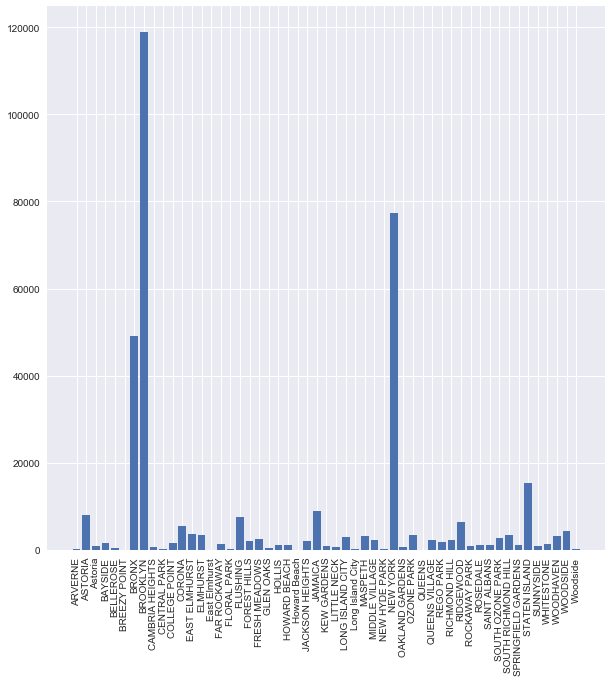

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.bar(city_comp.index,city_comp.values)
plt.xticks(rotation = 'vertical');

In [61]:
xx = data.groupby(['City','Complaint Type'])['Unique Key'].count()
foo = pd.DataFrame(xx)
bar = foo.reset_index()
print(bar[:4])
print(bar.nunique())
data['Complaint Type'].nunique()

      City    Complaint Type  Unique Key
0  ARVERNE      Animal Abuse          46
1  ARVERNE  Blocked Driveway          50
2  ARVERNE  Derelict Vehicle          32
3  ARVERNE  Disorderly Youth           2
City               53
Complaint Type     22
Unique Key        279
dtype: int64


24

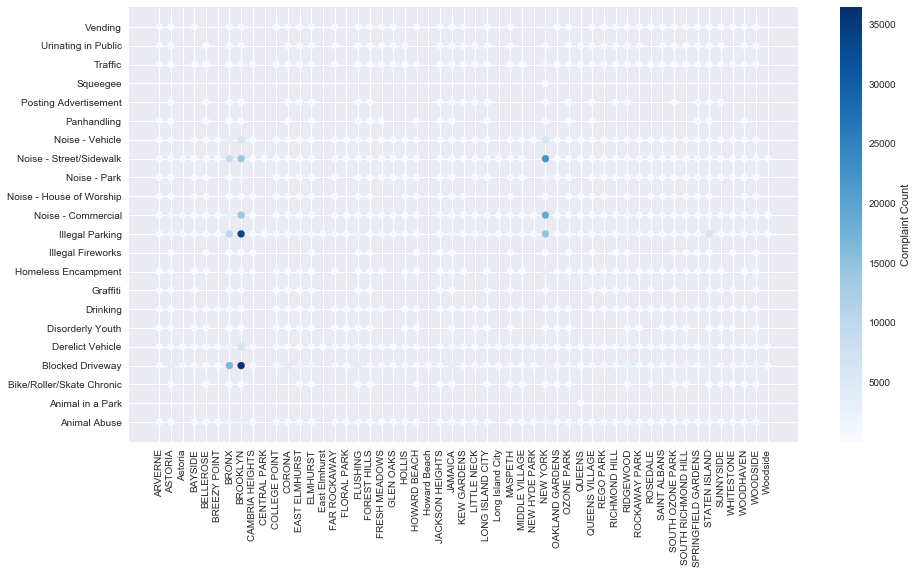

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.scatter(bar['City'], bar['Complaint Type'], c = bar['Unique Key'], cmap = 'Blues')
plt.colorbar(label = 'Complaint Count')
plt.xticks(rotation = 'vertical');

Above plot illustrates the relationship between count of various types of complaints and city. A quick glance at this plot tells us about severity of some particular complaint types and corresponding city. 

We can see that there are around 14 scatter points with relatively denser color shades (i.e. higher counts) spread amongst only in 3 cities (Bronx, Brooklyn and New York). It is also apparent that these scatter points belong to only a small subset of all complain types (4 out of 24). 

Essentially majority of complaints are about either parking or noise. 

In [ ]:
from sklearn.cluster import KMeans
model  = KMeans()